In [1]:
#QUESTION:

#What is the best console as a product of the ratings of the games released on it?

In [2]:
#ENVIRONMENT INITIALISING

#import pandas for data visualisation
import pandas as pd

#import matplot and seaborn for visualising date data
import matplotlib.pyplot as plt
import seaborn as sns

#Set to colour blind friendly palette
sns.set(palette='magma')

#correct matplot compatibility error
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

#import random command for label jitter
import random as rdm

#import numpy for mean calculation
import numpy as np 

#import string to filter punctuation
import string
from string import punctuation

#import function for calculating time period information
from dateutil.relativedelta import relativedelta

In [3]:
#DATA IMPORTING

#import the Meta Critic Scores (mcs) csv file
mcs = pd.read_csv('./output/MetaCritScores.csv')
mcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,Super Mario Galaxy,Wii,2007-11-12,97,action
2,3,Super Mario Galaxy 2,Wii,2010-05-23,97,action
3,4,Perfect Dark,Nintendo 64,2000-05-22,97,action
4,5,Metroid Prime,GameCube,2002-11-17,97,action
...,...,...,...,...,...,...
36252,105,ECW Anarchy Rulz,Dreamcast,2000-12-30,38,wrestling
36253,106,The Simpsons Wrestling,PlayStation,2001-04-12,32,wrestling
36254,107,Mucha Lucha! Mascaritas of the Lost Code,Game Boy Advance,2003-11-18,26,wrestling
36255,108,Hulk Hogan's Main Event,Xbox 360,2011-10-11,26,wrestling


In [4]:
#DATA INITIALISING

#Convert date-time column to data-time datatype
mcs['pub_date'] = pd.to_datetime(mcs['pub_date'])

#Check pub_date column is stored as datetime
mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   position  36257 non-null  int64         
 1   title     36257 non-null  object        
 2   platform  36257 non-null  object        
 3   pub_date  36257 non-null  datetime64[ns]
 4   rating    36257 non-null  int64         
 5   genre     36257 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
#DATA FILTERING

#Problem Example:
#mcs[mcs['title'] == "Legends of Wrestling II"]

#To remove redundant entries entered in multiple genres
#Group each title as individual platforms
#Use head(1) to take one entry for each title to remove genre redundnacy
#reset the index to merge the remaining titles with the top genre (tg) only  

tgmcs = mcs.copy()
tgmcs = tgmcs.groupby(['title','platform']).head(1).reset_index(drop=True)
tgmcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,Super Mario Galaxy,Wii,2007-11-12,97,action
2,3,Super Mario Galaxy 2,Wii,2010-05-23,97,action
3,4,Perfect Dark,Nintendo 64,2000-05-22,97,action
4,5,Metroid Prime,GameCube,2002-11-17,97,action
...,...,...,...,...,...,...
25954,3043,Interstellar Trader 2,PC,2003-03-21,31,strategy
25955,3044,Big Oil: Build an Oil Empire,PC,2006-07-31,31,strategy
25956,3045,Dino Master,DS,2006-05-25,28,strategy
25957,3050,The Apprentice,PC,2006-02-28,25,strategy


In [6]:
#DATA ANNOTATING

#create a dictionary for companies releasing platforms
compdict = {'Microsoft':['PC', 'Xbox', 'Xbox 360', 'Xbox One', 'Xbox Series X'],\
            'Google':['Stadia'],\
            'Sega':['Dreamcast'],\
            'Sony':['PSP','PlayStation','PlayStation 2','PlayStation 3','PlayStation 4',\
            'PlayStation 5','PlayStation Vita'],\
            'Apple':['iOS'],\
            'Nintendo':['3DS','DS','Game Boy Advance','GameCube','Nintendo 64', 'Switch', 'Wii', 'Wii U']}

#Expand the dictionary into a dataframe by iterating through each item
comp_df = pd.concat(pd.DataFrame({'name':k, 'value':v}) for k, v in compdict.items())

#Assign referencable columns to the new dataframe
comp_df.columns = ['company','platform']

#Merge the company data with the non-redundant dataframe
comp_mcs = pd.merge(tgmcs, comp_df, on='platform', how= 'inner')
comp_mcs

,position,title,platform,pub_date,rating,genre,company
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action,Sega
1,48,Jet Grind Radio,Dreamcast,2000-10-30,94,action,Sega
2,66,Quake III Arena,Dreamcast,2000-10-22,93,action,Sega
3,219,Marvel vs. Capcom 2,Dreamcast,2000-06-29,90,action,Sega
4,241,Unreal Tournament,Dreamcast,2001-03-13,90,action,Sega
...,...,...,...,...,...,...,...
25954,3353,Lost Words: Beyond the Page,Stadia,2020-03-27,78,action,Google
25955,7952,Pac-Man: Mega Tunnel Battle,Stadia,2020-11-17,67,action,Google
25956,11091,PixelJunk Raiders,Stadia,2021-03-01,49,action,Google
25957,1751,Submerged: Hidden Depths,Stadia,2020-12-03,73,adventure,Google


In [7]:
#Confirm the colour palette visually
sns.color_palette().as_hex()

['#221150', '#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']

In [8]:
#Creating a dictionary to map the hex codes to the company as a reference palette and to uniformly plot colour across graphs

#Dictionary to output company to colour palette map
col_comp = {}

#iterate through company and hex codes and add to output dictionary
for comp, code in zip(compdict.keys(), sns.color_palette().as_hex()):
    col_comp.update({ comp : code })
    
col_comp

{'Microsoft': '#221150',
 'Google': '#5f187f',
 'Sega': '#982d80',
 'Sony': '#d3436e',
 'Apple': '#f8765c',
 'Nintendo': '#febb81'}

In [9]:
#Add additional column for colour coding by company
comp_mcs['colour'] = comp_mcs['company'].map(col_comp)
comp_mcs


,position,title,platform,pub_date,rating,genre,company,colour
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action,Sega,#982d80
1,48,Jet Grind Radio,Dreamcast,2000-10-30,94,action,Sega,#982d80
2,66,Quake III Arena,Dreamcast,2000-10-22,93,action,Sega,#982d80
3,219,Marvel vs. Capcom 2,Dreamcast,2000-06-29,90,action,Sega,#982d80
4,241,Unreal Tournament,Dreamcast,2001-03-13,90,action,Sega,#982d80
...,...,...,...,...,...,...,...,...
25954,3353,Lost Words: Beyond the Page,Stadia,2020-03-27,78,action,Google,#5f187f
25955,7952,Pac-Man: Mega Tunnel Battle,Stadia,2020-11-17,67,action,Google,#5f187f
25956,11091,PixelJunk Raiders,Stadia,2021-03-01,49,action,Google,#5f187f
25957,1751,Submerged: Hidden Depths,Stadia,2020-12-03,73,adventure,Google,#5f187f


In [10]:
#DATA PROCESSING FOR ANALYSIS


#create dataframe with mean rating of each platform
plat_rate = comp_mcs.groupby('platform').mean().reset_index().drop('position',axis=1)

#create dataframe with first (.min) released game per platform
plat_date = pd.DataFrame(comp_mcs.groupby('platform')['pub_date'].min()).reset_index()

#Create a minimal dataframe to add company and colour info and remove redundant rows
comp_min = comp_mcs.drop(['position','title','pub_date','rating','genre'], axis = 1, inplace=False).drop_duplicates(inplace=False) 

#merge mean ratings, company info and first release date dataframes by platforms and order from oldest to newest
plat_df = pd.merge(plat_rate, plat_date, on='platform', how= 'inner')
plat_df = pd.merge(plat_df, comp_min, on='platform', how= 'inner').sort_values('pub_date')

#rename dataframe columns for referencing
plat_df.columns = ['platform','meanrate','date','company','colour']

plat_df

,platform,meanrate,date,company,colour
6,PC,70.999098,1994-09-30,Microsoft,#221150
8,PlayStation,69.454976,1995-09-09,Sony,#d3436e
5,Nintendo 64,75.569620,1996-09-26,Nintendo,#febb81
2,Dreamcast,71.991667,1999-09-08,Sega,#982d80
9,PlayStation 2,68.249781,2000-10-21,Sony,#d3436e
3,Game Boy Advance,66.720322,2001-05-29,Nintendo,#febb81
18,Xbox,69.373832,2001-10-29,Microsoft,#221150
4,GameCube,69.064516,2001-11-09,Nintendo,#febb81
1,DS,64.331034,2004-11-16,Nintendo,#febb81
7,PSP,67.941176,2005-03-14,Sony,#d3436e


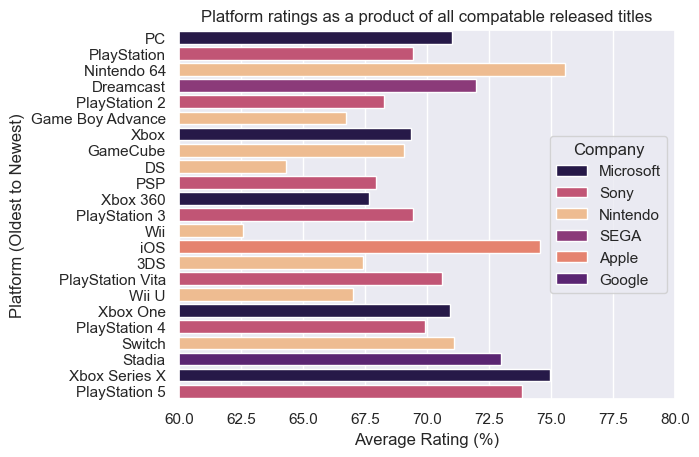

In [11]:
#DATA VISUALISATION

#Plot all platforms mean ratings in time order with company information by colour
#normalise bar width using dodge = False and assign the colour map with palette = col_comp
pplot = sns.barplot(data=plat_df, y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Oldest to Newest)'),
         title = ('Platform ratings as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Microsoft','Sony','Nintendo','SEGA','Apple','Google'],
             title='Company')            

#Define Region of interest
pplot.set(xlim=(60,80));

#NOTE: There is an apparent trough in the data when plotted over time, let's investigate that on the company level.

In [12]:
#DATA REFINEMENT

#Group the platform dataframe by their company
compplot = plat_df.groupby('company')

#Isolate the Microsoft, Sony and Nintendo main console companies
MS = compplot.get_group('Microsoft')
PS = compplot.get_group('Sony')
NT = compplot.get_group('Nintendo')

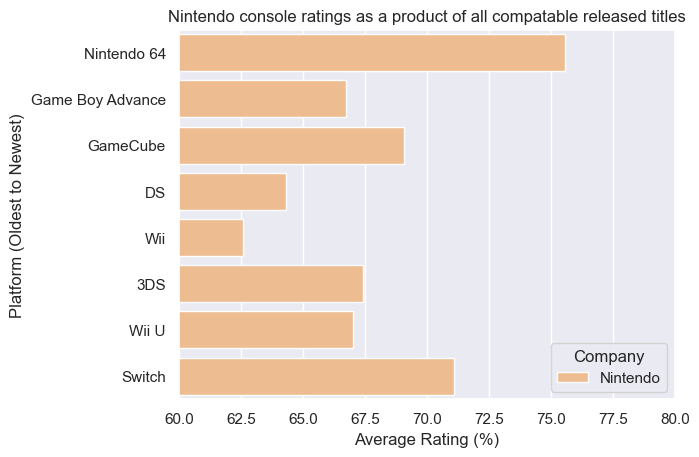

In [13]:
#DATA VISUALISATION


#Plot Nintendo Consoles by mean rating in time order for rating region of interest
#normalise bar width using dodge = False and assign the colour map with palette = col_comp
pplot = sns.barplot(data=NT, y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Oldest to Newest)'),
         title = ('Nintendo console ratings as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Nintendo'],
             title='Company')            

#Define Region of interest
pplot.set(xlim=(60,80));

#NOTE: Nintendos ambitious mould breaking approach to gaming innovation leads to the highest spread of ratings
#Looking at standard deviation one would expect the highest being nintendo as a company
#Individual console standard deviation in ratings would also be interesting to plot

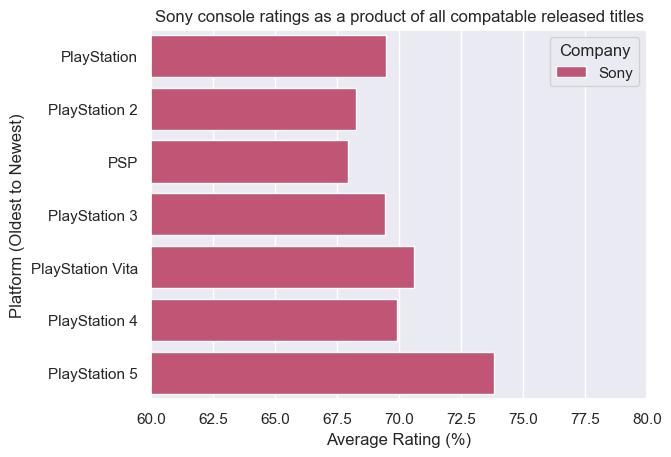

In [14]:
#DATA VISUALISATION

#Plot Sony Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=PS, y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Oldest to Newest)'),
         title = ('Sony console ratings as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Sony'],
             title='Company')            

#Define Region of interest
pplot.set(xlim=(60,80));

#NOTE: Sony Consoles appear to trend upward in rating with a less pronounced dip
#Could the PS5 success be a result of the recency of it's release?
#Look at console rating as a product of only the first year of game releases

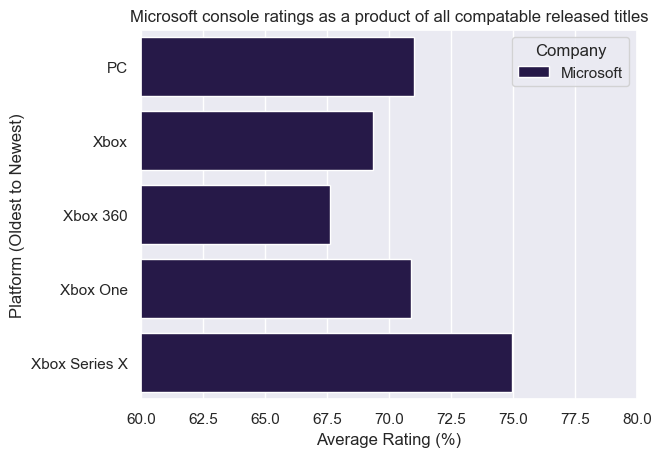

In [15]:
#DATA VISUALISATION

#Plot Microsoft Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=MS, y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Oldest to Newest)'),
         title = ('Microsoft console ratings as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Microsoft'],
             title='Company')            

#Define Region of interest
pplot.set(xlim=(60,80));

#NOTE: Microsoft appears to trough early in rating as expected however the PC contains multiple major operating systems
#It may also be worthwhile to separate the PC bar into:
#pre-XP, XP 2001-10-25, Vista 2007-01-30, 7 2009-10-22, 8 2012-10-26, 10 2015-07-29, 11 2021-10-05

In [16]:
#DATA MODIFYING

#Since the PC has undergone many iterations it should be split into major eras rather than just PC
#The earliest game entry is documented as 1994-09-30 not even a year before the Windows 95 release on 1995-08-24 
#For simplicity the games released on and before Windows 95 will be called pre-Windows 98
#source for major version release dates: "https://en.wikipedia.org/wiki/List_of_Microsoft_Windows_versions"
#pre-98, 98 1998-06-25, XP 2001-10-25, Vista 2007-01-30, 7 2009-10-22, 8 2012-10-26, 10 2015-07-29, 11 2021-10-05

#The data is split into two versions, one that has only (==) the PC platform titles and one with no (!=) PC platform titles
PC_only = comp_mcs[comp_mcs['platform'] == 'PC']
no_PC = comp_mcs[comp_mcs['platform'] != 'PC']

#The platform column is assigned a new Windows version depending on when the title is published
#The designation of a version is defined by the release day of the version and ends the day before the succeeding version is released
PC_only = PC_only.assign(platform = ['Windows 98' if ((pub_date >= pd.to_datetime("1998-06-25")) & (pub_date < pd.to_datetime("2001-10-25")))
                                     else 'Windows XP' if (pub_date >= pd.to_datetime("2001-10-25")) & (pub_date < pd.to_datetime("2007-01-30"))
                                     else 'Windows Vista' if (pub_date >= pd.to_datetime("2007-01-30")) & (pub_date < pd.to_datetime("2009-10-22"))
                                     else 'Windows 7' if (pub_date >= pd.to_datetime("2009-10-22")) & (pub_date < pd.to_datetime("2012-10-26"))
                                     else 'Windows 8' if (pub_date >= pd.to_datetime("2012-10-26")) & (pub_date < pd.to_datetime("2015-07-29"))
                                     else 'Windows 10' if (pub_date >= pd.to_datetime("2015-07-29")) & (pub_date < pd.to_datetime("2021-10-05"))
                                     else 'Windows 11' if pub_date >= pd.to_datetime("2021-10-05")
                                     else 'pre-Windows 98' for pub_date in PC_only['pub_date']])

#The modified dataframe with PC platform as eras is added back together with the dataframe that has no PC entries
pcmcs = pd.concat([no_PC, PC_only], axis=0, ignore_index = True)

pcmcs

,position,title,platform,pub_date,rating,genre,company,colour
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action,Sega,#982d80
1,48,Jet Grind Radio,Dreamcast,2000-10-30,94,action,Sega,#982d80
2,66,Quake III Arena,Dreamcast,2000-10-22,93,action,Sega,#982d80
3,219,Marvel vs. Capcom 2,Dreamcast,2000-06-29,90,action,Sega,#982d80
4,241,Unreal Tournament,Dreamcast,2001-03-13,90,action,Sega,#982d80
...,...,...,...,...,...,...,...,...
25954,3041,Airport Tycoon 2,Windows XP,2003-02-26,32,strategy,Microsoft,#221150
25955,3043,Interstellar Trader 2,Windows XP,2003-03-21,31,strategy,Microsoft,#221150
25956,3044,Big Oil: Build an Oil Empire,Windows XP,2006-07-31,31,strategy,Microsoft,#221150
25957,3050,The Apprentice,Windows XP,2006-02-28,25,strategy,Microsoft,#221150


In [17]:
#DATA PROCESSING FOR SECONDARY ANALYSIS

#Group the non-genre redundant dataframe by platforms
pc_group = pcmcs.groupby('platform')

#create dataframe with mean rating of each platform
pc_rate = pc_group.mean().reset_index().drop('position',axis=1)

#create dataframe with first (.min) released game per platform
pc_date = pd.DataFrame(pc_group['pub_date'].min()).reset_index()

#Create a minimal dataframe to add company and colour info and remove redundant rows
pc_min = pcmcs.drop(['position','title','pub_date','rating','genre'], axis = 1, inplace=False).drop_duplicates(inplace=False) 

#merge mean ratings and date dataframes by platforms and order from oldest to newest
pc_df = pd.merge(pc_date, pc_rate, on='platform', how= 'inner')
pc_df = pd.merge(pc_df, pc_min, on='platform', how= 'inner').sort_values('pub_date')

#rename dataframe columns for referencing
pc_df.columns = ['platform','date','meanrate', 'company', 'colour']

pc_df

,platform,date,meanrate,company,colour
29,pre-Windows 98,1994-09-30,80.500000,Microsoft,#221150
7,PlayStation,1995-09-09,69.454976,Sony,#d3436e
5,Nintendo 64,1996-09-26,75.569620,Nintendo,#febb81
21,Windows 98,1998-07-31,71.969697,Microsoft,#221150
2,Dreamcast,1999-09-08,71.991667,Sega,#982d80
8,PlayStation 2,2000-10-21,68.249781,Sony,#d3436e
3,Game Boy Advance,2001-05-29,66.720322,Nintendo,#febb81
23,Windows XP,2001-10-26,68.652296,Microsoft,#221150
24,Xbox,2001-10-29,69.373832,Microsoft,#221150
4,GameCube,2001-11-09,69.064516,Nintendo,#febb81


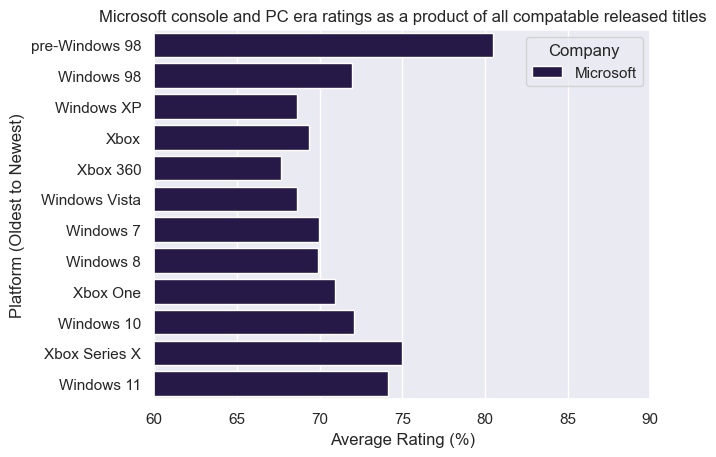

In [18]:
#DATA VISUALISATION

#Group the platform dataframe by their company
pc_MS = pc_df[pc_df['company'] == 'Microsoft']

#Plot Microsoft Consoles by mean rating in time order for rating region of interest
pplot = sns.barplot(data=pc_MS, y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Oldest to Newest)'),
         title = ('Microsoft console and PC era ratings as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Microsoft'],
             title='Company')

#Define Region of interest
pplot.set(xlim=(60,90));

#INITIAL NOTE: Microsoft appears to trough early in rating as expected however the PC contains multiple major operating systems
#UPDATE: Splitting Microsoft Versions continues to trend with other consoles suggesting a trough in game quality or a spike in harsh reviewing.

In [19]:
#DATA PROCESSING FOR TERTIARY ANALYSIS

#Question: Is the success of the Xbox Series X and Playstation 5 due to its more recent release?
#Solution: Platform ratings are calculated using the games released within one year of the first game on the console.

#Apply filter to grouped dataframes
#Keep only titles with a publication date up to one year (relativedelta) after the first (.min) entry
pd_group = pc_group.apply(lambda x: x[x['pub_date'] < (x['pub_date'].min() + relativedelta(years = 1))])

#convert the results of the filter back into a groupby object
year_one = pd_group.reset_index(drop=True).groupby('platform') 

#create dataframe with mean rating of each platform
yo_rate = year_one.mean().reset_index().drop('position',axis=1)

#create dataframe with rating deviation of each platform
yo_std = year_one.std().reset_index().drop('position',axis=1)

#merge mean ratings and date dataframes by platforms then add standard deviation column
yo_df = pd.merge(pc_date, yo_rate, on='platform')
yo_df = pd.merge(yo_df, yo_std, on='platform')
yo_df = pd.merge(yo_df, pc_min, on='platform')

#rename dataframe columns for referencing
yo_df.columns = ['platform','date','meanrate','stdrate', 'company', 'colour']
yo_df

,platform,date,meanrate,stdrate,company,colour
0,3DS,2011-03-22,64.087500,12.341341,Nintendo,#febb81
1,DS,2004-11-16,67.525424,14.159627,Nintendo,#febb81
2,Dreamcast,1999-09-08,74.111111,15.877738,Sega,#982d80
3,Game Boy Advance,2001-05-29,68.113043,14.205735,Nintendo,#febb81
4,GameCube,2001-11-09,70.907407,13.584995,Nintendo,#febb81
5,Nintendo 64,1996-09-26,88.500000,5.554921,Nintendo,#febb81
6,PSP,2005-03-14,70.128205,10.189578,Sony,#d3436e
7,PlayStation,1995-09-09,79.000000,14.142136,Sony,#d3436e
8,PlayStation 2,2000-10-21,71.077519,12.387375,Sony,#d3436e
9,PlayStation 3,2006-11-13,72.837209,11.384055,Sony,#d3436e


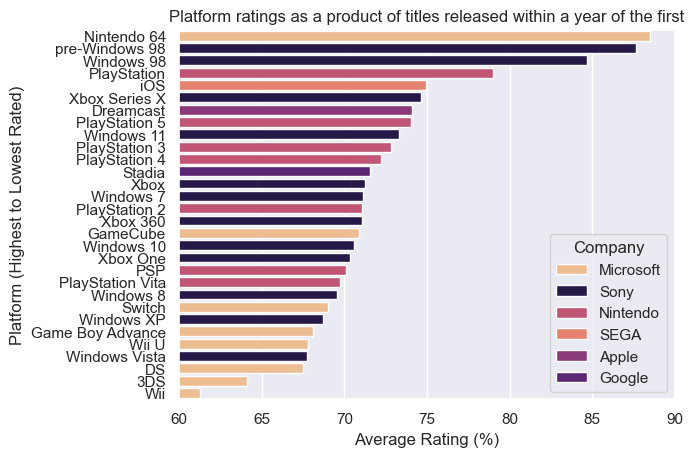

In [20]:
#DATA VISUALISATION

#Plot all platforms mean rating in order with company information by colour
pplot = sns.barplot(data=yo_df.sort_values('meanrate', ascending = False), 
                    y='platform',x='meanrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Average Rating (%)'),
          ylabel=('Platform (Highest to Lowest Rated)'),
         title = ('Platform ratings as a product of titles released within a year of the first'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Microsoft','Sony','Nintendo','SEGA','Apple','Google'],
             title='Company') 

#Define Region of interest
pplot.set(xlim=(60,90));

#ANSWER: The Playstation 5 and Xbox Series X are overrepresented by the recency of their release.
#Nintendo 64, the PC, and the Playstation all performed notably better at their release.

In [21]:
#Significance by using the 97.5th percentile point (mean +- 1.96 sd), 95% of normally distributed values fall within.
#Calculate high and low significance bounds
sig_high = np.mean(yo_df['meanrate']) + (1.96 * np.std(yo_df['meanrate']))
sig_low = np.mean(yo_df['meanrate']) - (1.96 * np.std(yo_df['meanrate']))

#Iterate through each platforms ratings
for platform, rating in zip(yo_df['platform'], yo_df['meanrate']):
    
    #if a rating is above the high significance threshold, report that platform
    if rating > sig_high:
        print(f'{platform} was exceptionally highly rated')
        
    #additionally if a rating is below the low significance threshold, report that platform    
    elif rating < sig_low:
        print(f'{platform} was exceptionally poorly rated')

#print end of iteration message for clarity on output
print('Based on the titles released within the first year')    

Nintendo 64 was exceptionally highly rated
Windows 98 was exceptionally highly rated
pre-Windows 98 was exceptionally highly rated
Based on the titles released within the first year


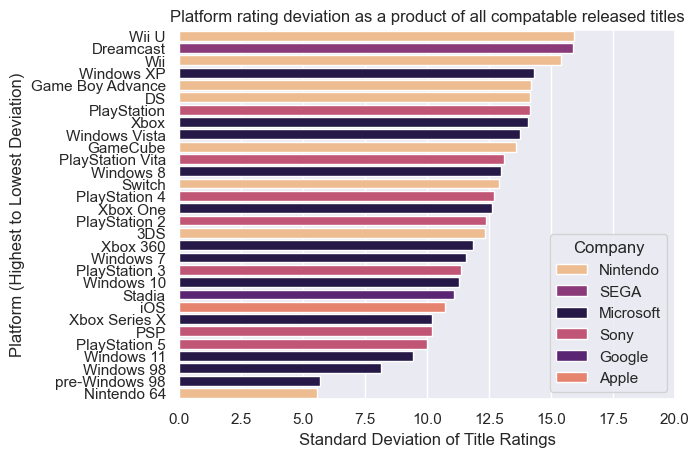

In [22]:
#DATA VISUALISATION

#Plot all platforms rating deviation in order with company information by colour
pplot = sns.barplot(data=yo_df.sort_values('stdrate', ascending = False), y='platform',x='stdrate', hue='company', dodge=False, palette = col_comp)

#additionally add title and override axis titles
pplot.set(xlabel=('Standard Deviation of Title Ratings'),
          ylabel=('Platform (Highest to Lowest Deviation)'),
         title = ('Platform rating deviation as a product of all compatable released titles'))

#assign variable to modify legend handles
legend_handles, _= pplot.get_legend_handles_labels()

#modify legend handles and legend title
pplot.legend(legend_handles, ['Nintendo','SEGA','Microsoft','Sony','Google','Apple'],
             title='Company')            

#Define Region of interest
pplot.set(xlim=(0,20));

#Its notable that the highest average rating consoles also have the lowest deviation
#Plot mean rating and deviation to observe the correlation

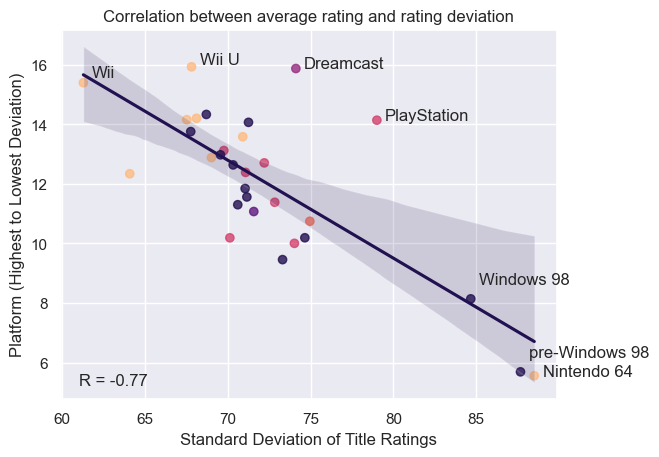

In [26]:
#DATA VISUALISATION


#Plot scatter graph with line of regression for rating mean against deviation
#Manually assign point colour using a dictionary to map color arguement to the assigned colour column for each value
ratecplot = sns.regplot(data = yo_df, x = 'meanrate', y ='stdrate', scatter_kws={'color':list(yo_df['colour'])});

#Calculate correlation R value for rating mean and deviation, retrieve from array and round to 2 decimal places
coeff = np.corrcoef(yo_df['meanrate'],yo_df['stdrate'])[0][1].round(2)

#Add text for R value of the correlation
ratecplot.text(61, 5.25, f'R = {coeff}');

#additionally add title and override axis titles
ratecplot.set(xlabel=('Standard Deviation of Title Ratings'),
              ylabel=('Platform (Highest to Lowest Deviation)'),
              title = ('Correlation between average rating and rating deviation'))

#Set seed for reproducable label stutter
rdm.seed(2)

#iterate through each platforms mean and deviation
for mean, std, platform in zip(yo_df['meanrate'],yo_df['stdrate'],yo_df['platform']):
    
    #Set condition values for high and low deviation platforms or notable outliers of the trend
    if (std > 15) or (std < 9) or (platform == 'PlayStation'):
        
        #add platform text (s=) to the right of the mean value and at a random stutter distance above the deviation value
        ratecplot.text(x=mean+0.5, y=std+(rdm.randint(0,5)/10), s=platform)
        
        
#The consoles with the highest standard deviation tended to perform the poorest so is this a fair scoring of the console
#Note: The Dreamcast and PlayStation are notable for being higher deviation platforms that are higher rated than youd expect.
#Instead we could consider the best console is a product of its top 100 scoring titles?

In [24]:
#look at scores as product of their 100 top releases